In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [4]:
X, y = mnist["data"], mnist["target"]
>>> X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
>>> X.shape
(70000, 784)  

(70000, 784)

In [6]:
>>> y.shape
(70000,)

(70000,)

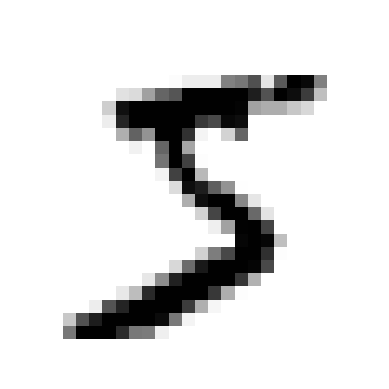

In [7]:
import matplotlib as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [8]:
>>> y[0] == '5'

True

In [9]:
x_train, y_train, x_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [10]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [12]:
sgd_clf.predict([some_digit])

array([ True])

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [14]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(x_train, y_train_5)
print(any(dummy_clf.predict(x_train)))  # Always predicts the most frequent class

False


In [15]:
cross_val_score(dummy_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [16]:
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_predict)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [18]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method="decision_function")

In [19]:
from sklearn.metrics import precision_recall_curve
precision, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

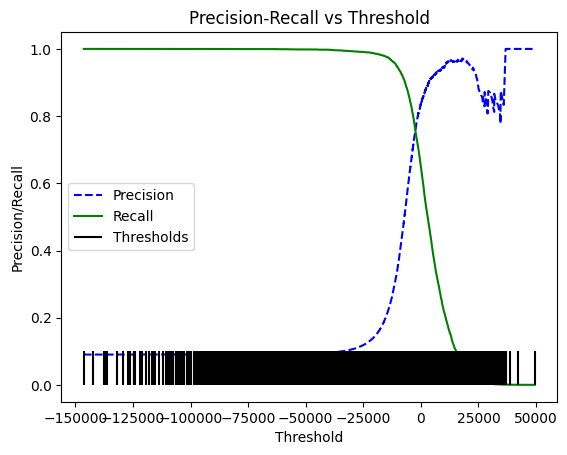

In [20]:
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.vlines(thresholds,0,0.1,"k",label="Thresholds")  # Commented out to remove black lines
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Precision/Recall")
plt.title("Precision-Recall vs Threshold")
plt.show()

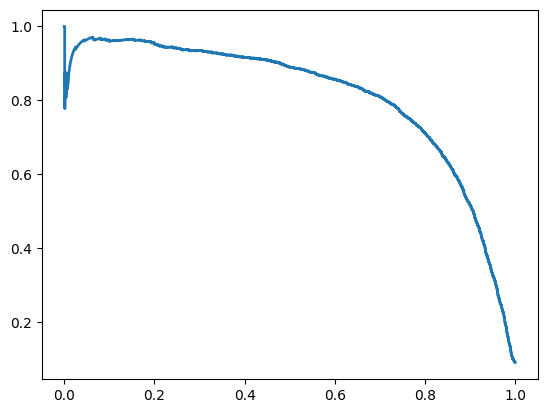

In [21]:
plt.plot(recalls, precision, linewidth=2, label="Precision-Recall Curve");

In [22]:
idx_for_90_precision = (precision>=0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]

In [23]:
y_train_pred_90 = (y_scores>=threshold_for_90_precision)

In [24]:
from sklearn.metrics import precision_score

precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [25]:
from sklearn.metrics import recall_score

recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [26]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) 

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [28]:
y_probab_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3, method="predict_proba")

In [29]:
>>> y_probab_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [30]:
y_scores_forest = y_probab_forest[:, 1]  # Score = proba of positive class
precision_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest) 

In [31]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(x_train[:2000], y_train[:2000])  # Training takes too long on the full dataset

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [33]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [36]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [37]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(x_train[:5000], y_train[:5000])  #

,estimator,SVC(random_state=42)
,n_jobs,None
,verbose,0
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001


In [38]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [39]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [40]:
sgd_clf.decision_function([some_digit]).round(2)

array([[-31893.03, -34419.69,  -9530.64,   1823.73, -22320.15,  -1385.8 ,
        -26188.91, -16147.51,  -4604.35, -12050.77]])

In [45]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [46]:
# Let's demonstrate why StandardScaler improves performance
from sklearn.preprocessing import StandardScaler

# First, let's see the current data distribution
print("Original data statistics:")
print(f"Mean: {x_train.mean():.2f}")
print(f"Std: {x_train.std():.2f}")
print(f"Min: {x_train.min()}")
print(f"Max: {x_train.max()}")

# Apply StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print("\nScaled data statistics:")
print(f"Mean: {x_train_scaled.mean():.2f}")
print(f"Std: {x_train_scaled.std():.2f}")
print(f"Min: {x_train_scaled.min():.2f}")
print(f"Max: {x_train_scaled.max():.2f}")

Original data statistics:
Mean: 33.32
Std: 78.57
Min: 0
Max: 255

Scaled data statistics:
Mean: -0.00
Std: 0.96
Min: -1.27
Max: 244.95


In [47]:
# Now let's compare SGD performance with and without scaling
print("Training SGD without scaling:")
sgd_unscaled = SGDClassifier(random_state=42)
scores_unscaled = cross_val_score(sgd_unscaled, x_train, y_train, cv=3, scoring="accuracy")
print(f"Accuracy without scaling: {scores_unscaled.mean():.4f} (+/- {scores_unscaled.std()*2:.4f})")

print("\nTraining SGD with scaling:")
sgd_scaled = SGDClassifier(random_state=42)
scores_scaled = cross_val_score(sgd_scaled, x_train_scaled, y_train, cv=3, scoring="accuracy")
print(f"Accuracy with scaling: {scores_scaled.mean():.4f} (+/- {scores_scaled.std()*2:.4f})")

print(f"\nImprovement: {(scores_scaled.mean() - scores_unscaled.mean())*100:.2f} percentage points")

Training SGD without scaling:
Accuracy without scaling: 0.8670 (+/- 0.0128)

Training SGD with scaling:
Accuracy with scaling: 0.8970 (+/- 0.0090)

Improvement: 3.01 percentage points


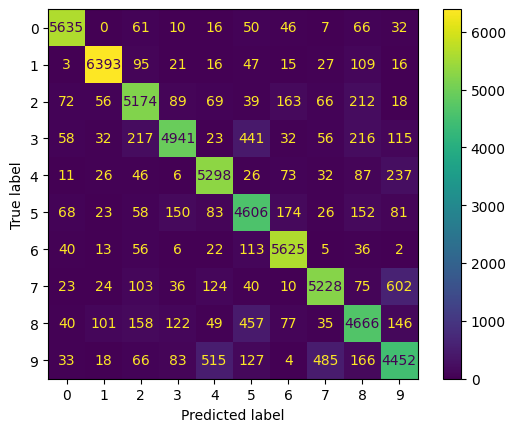

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

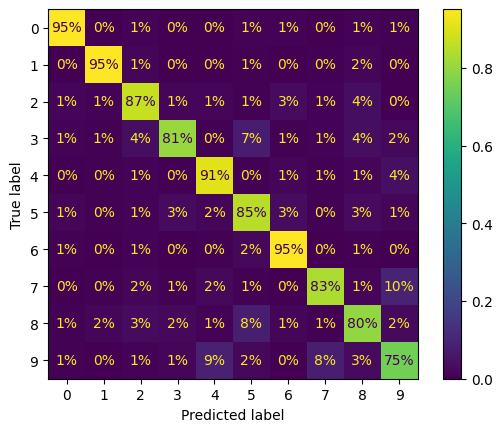

In [49]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='true', values_format=".0%")
plt.show()

In [50]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype(int) % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)
knn_clf.predict([some_digit])

array([[False,  True]])

In [51]:
from sklearn.metrics import f1_score

y_train_knn_pred = cross_val_predict(knn_clf, x_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

In [ ]:
from sklearn.multioutput import ClassifierChain

chai_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chai_clf.fit(x_train[:2000], y_multilabel[:2000])